In [5]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('../data/netflix_users.csv')
print(df)

       User_ID              Name  Age    Country Subscription_Type  \
0            1    James Martinez   18     France           Premium   
1            2       John Miller   23        USA           Premium   
2            3        Emma Davis   60         UK             Basic   
3            4       Emma Miller   44        USA           Premium   
4            5        Jane Smith   68        USA          Standard   
...        ...               ...  ...        ...               ...   
24995    24996      David Miller   18  Australia           Premium   
24996    24997       Jane Miller   17        USA           Premium   
24997    24998      Sarah Miller   14        USA           Premium   
24998    24999  Michael Williams   71        USA             Basic   
24999    25000       James Jones   19    Germany           Premium   

       Watch_Time_Hours Favorite_Genre  Last_Login  satisfaction_score  \
0                 80.26          Drama   2024.5.12                   7   
1          

In [6]:
from sklearn.preprocessing import StandardScaler

df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')

today = pd.to_datetime("2025-04-17")

df['recent_login'] = (today - df['Last_Login']).dt.days <= 30

df['days_since_last_login'] = (today - df['Last_Login']).dt.days

df['recent_login'] = df['recent_login'].fillna(False)
df['days_since_last_login'] = df['days_since_last_login'].fillna(999)

df = pd.get_dummies(df, columns=['Country', 'Subscription_Type', 'Favorite_Genre',
                                    'primary_device'], drop_first=True)

scaler = StandardScaler()

df[['Age', 'Watch_Time_Hours', 'satisfaction_score', 'daily_watch_hours',
    'monthly_income', 'promo_offers_used', 'profile_count',
    'days_since_last_login']] = scaler.fit_transform(df[['Age', 'Watch_Time_Hours', 'satisfaction_score',
                                                        'daily_watch_hours', 'monthly_income',
                                                        'promo_offers_used', 'profile_count', 'days_since_last_login']])

df['churn_status'] = df['churn_status'].map({'Yes': 1, 'No': 0})

In [7]:
df.describe()

,User_ID,Age,Watch_Time_Hours,Last_Login,satisfaction_score,daily_watch_hours,monthly_income,promo_offers_used,profile_count,churn_status,days_since_last_login
count,25000.000000,2.500000e+04,2.500000e+04,25000,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,25000.00000,2.500000e+04
mean,12500.500000,-7.347012e-17,-2.384937e-16,2024-09-07 03:44:48.768000,4.254019e-16,2.415845e-17,-2.557954e-18,1.037392e-17,3.034017e-17,0.22224,-1.206502e-16
min,1.000000,-1.708792e+00,-1.747174e+00,2024-03-08 00:00:00,-4.162202e+00,-1.747595e+00,-2.719640e+00,-8.137776e-01,-1.334032e+00,0.00000,-1.717541e+00
25%,6250.750000,-8.922354e-01,-8.516820e-01,2024-06-07 00:00:00,-4.623024e-01,-8.519181e-01,-7.967732e-01,-8.137776e-01,-5.210936e-01,0.00000,-8.769234e-01
50%,12500.500000,-2.464369e-02,3.618116e-03,2024-09-07 00:00:00,4.626724e-01,3.950615e-03,-6.887399e-02,-8.137776e-01,-5.210936e-01,0.00000,1.474575e-03
75%,18750.250000,8.429481e-01,8.564390e-01,2024-12-09 00:00:00,4.626724e-01,8.566766e-01,7.041819e-01,1.228837e+00,2.918449e-01,0.00000,8.704274e-01
max,25000.000000,1.710540e+00,1.744284e+00,2025-03-08 00:00:00,2.312622e+00,1.743973e+00,4.096327e+00,1.228837e+00,1.917722e+00,1.00000,1.729935e+00
std,7217.022701,1.000020e+00,1.000020e+00,NaN,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.41576,1.000020e+00


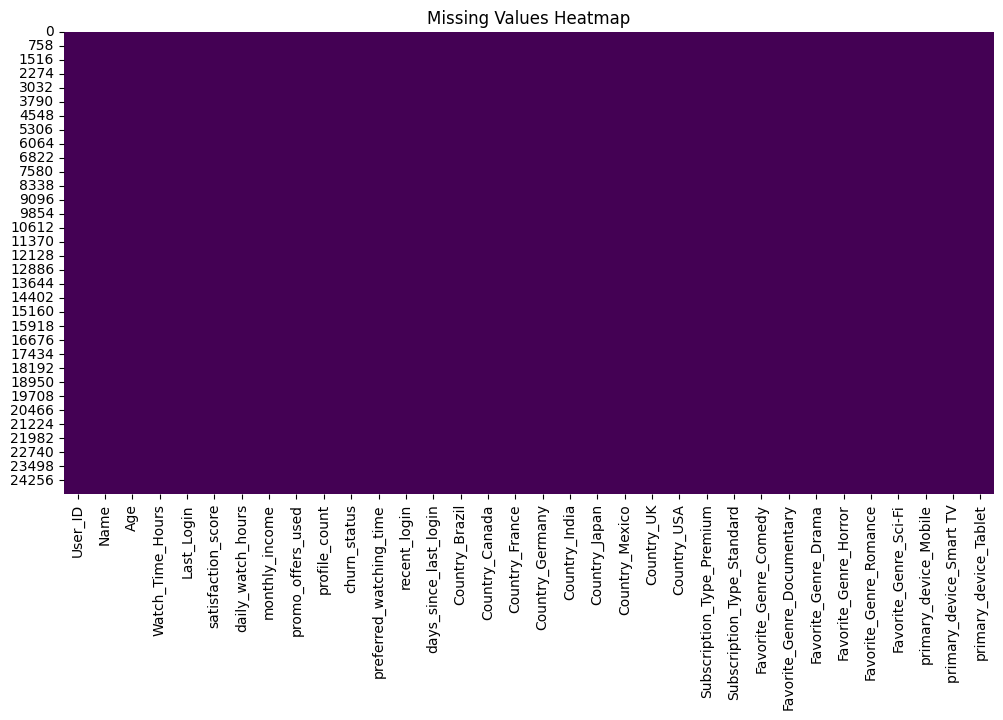

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# 결측치 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

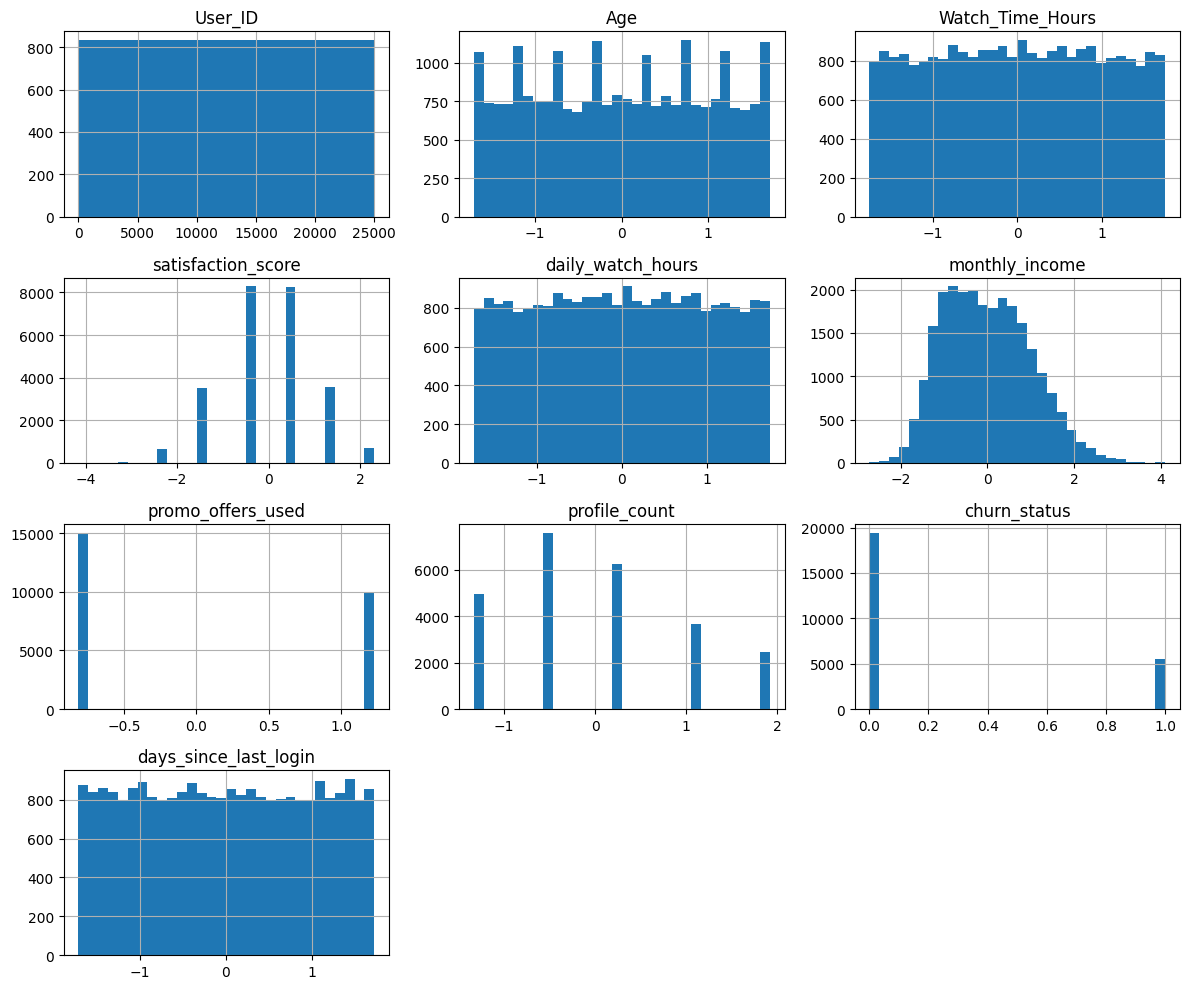

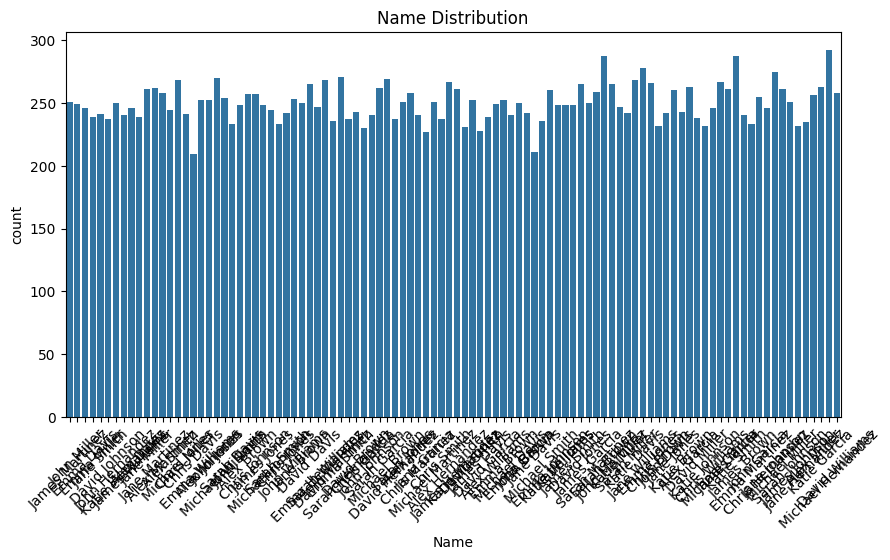

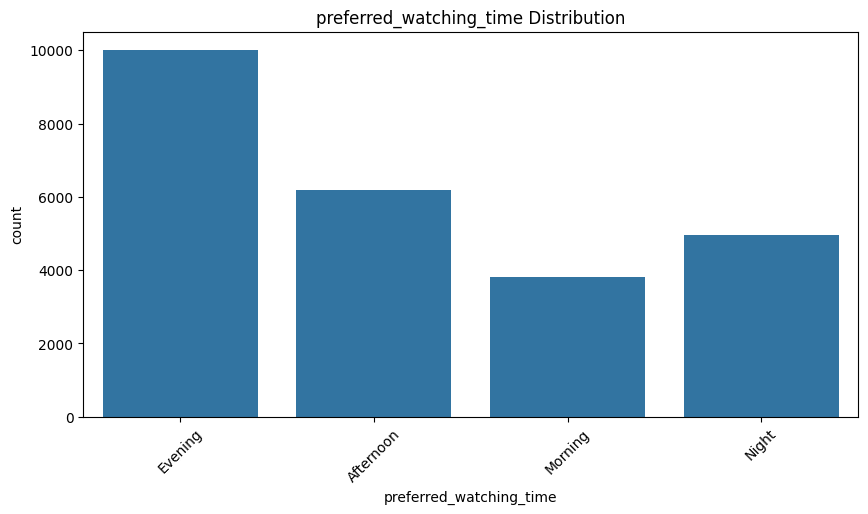

In [9]:
import numpy as np
# 숫자형 변수 분포 시각화
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# 범주형 변수 분포 시각화
df_categorical = df.select_dtypes(include=[object])
for col in df_categorical.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


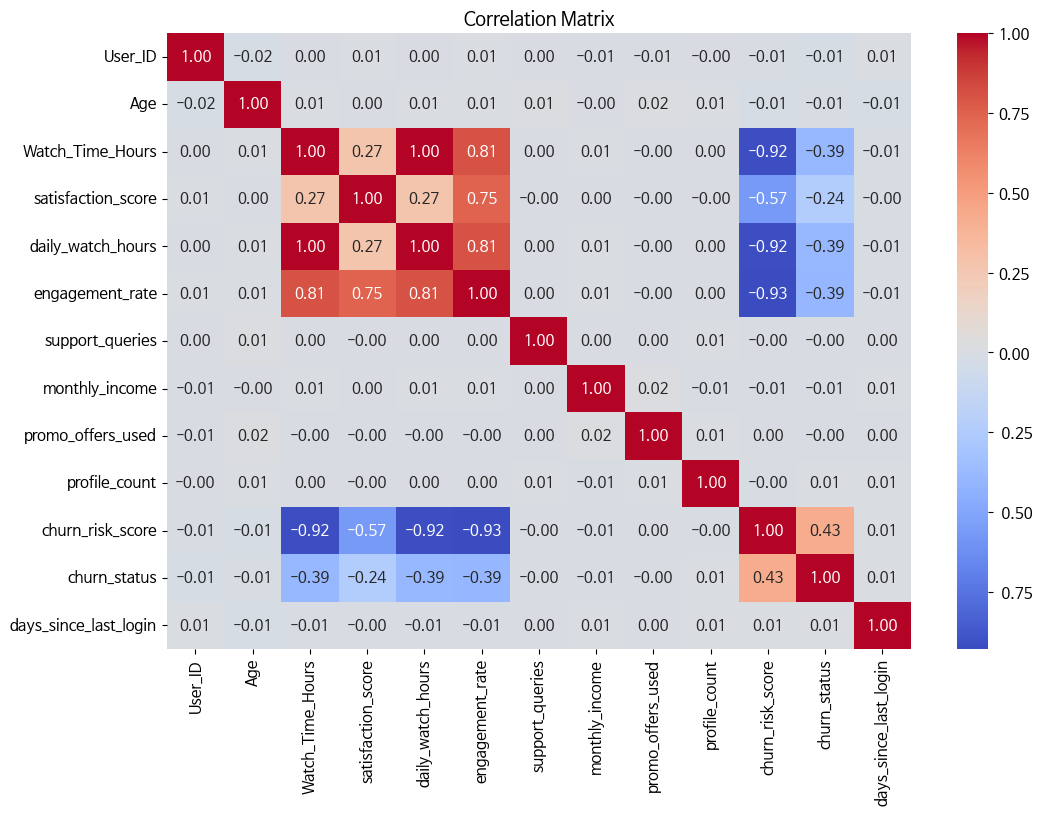

In [45]:
# 상관 관계 히트맵
# 숫자형 데이터만 선택하여 상관 관계 계산
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# 상관 관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [10]:
print(df.columns)

Index(['User_ID', 'Name', 'Age', 'Watch_Time_Hours', 'Last_Login',
       'satisfaction_score', 'daily_watch_hours', 'monthly_income',
       'promo_offers_used', 'profile_count', 'churn_status',
       'preferred_watching_time', 'recent_login', 'days_since_last_login',
       'Country_Brazil', 'Country_Canada', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Mexico', 'Country_UK',
       'Country_USA', 'Subscription_Type_Premium',
       'Subscription_Type_Standard', 'Favorite_Genre_Comedy',
       'Favorite_Genre_Documentary', 'Favorite_Genre_Drama',
       'Favorite_Genre_Horror', 'Favorite_Genre_Romance',
       'Favorite_Genre_Sci-Fi', 'primary_device_Mobile',
       'primary_device_Smart TV', 'primary_device_Tablet'],
      dtype='object')


                Watch_Time_Hours  satisfaction_score  daily_watch_hours
primary_device                                                         
Mobile                  0.000238            0.010162           0.000237
Smart TV               -0.001240           -0.012615          -0.001239
Tablet                  0.003041           -0.011893           0.003040


/var/folders/y6/6y5l3z5546z725wff41_qwtc0000gn/T/ipykernel_10969/2202128753.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_grouped.index, y=device_grouped['Watch_Time_Hours'], palette='pastel')


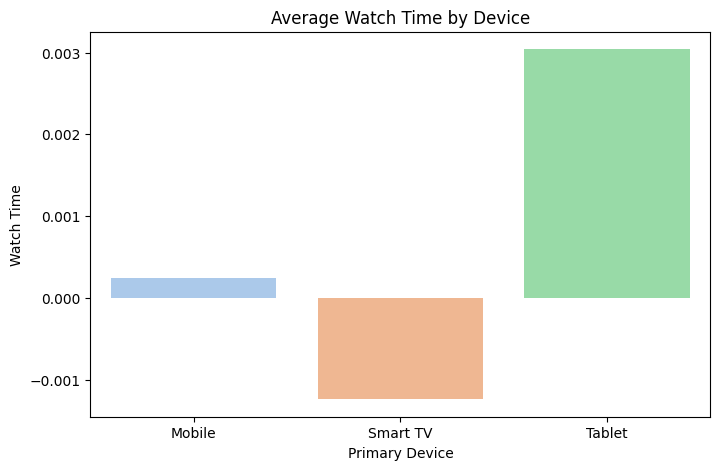

In [11]:
# 디바이스 별로 groupby해서 이용 시간 분석?

device_cols = ['primary_device_Mobile', 'primary_device_Smart TV', 'primary_device_Tablet']
df['primary_device'] = df[device_cols].idxmax(axis=1).str.replace('primary_device_', '')
# 디바이스별 평균 시청 시간, 만족도 등
device_grouped = df.groupby('primary_device')[['Watch_Time_Hours', 'satisfaction_score', 'daily_watch_hours']].mean()
print(device_grouped)
import seaborn as sns
import matplotlib.pyplot as plt

# 평균 시청 시간 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=device_grouped.index, y=device_grouped['Watch_Time_Hours'], palette='pastel')
plt.title('Average Watch Time by Device')
plt.ylabel('Watch Time')
plt.xlabel('Primary Device')
plt.show()

In [14]:
import sys
# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

# Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

# 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

# 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
# --------------------------------------------
plt.rcParams['font.family'] = 'AppleGothic'    #사용 방법1 mac

# plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1 window 
# plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2 window
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['AppleGothic'] 11.0


       User_ID             Name       Age  Watch_Time_Hours Last_Login  \
0            1   James Martinez -1.453618         -1.467332 2024-05-12   
1            2      John Miller -1.198444         -0.624070 2025-02-05   
2            3       Emma Davis  0.689844         -1.622268 2025-01-24   
3            4      Emma Miller -0.126713         -0.834249 2024-03-25   
7            8  Katie Hernandez  1.098122         -1.240463 2024-10-30   
...        ...              ...       ...               ...        ...   
24994    24995      Jane Miller  1.506401         -1.580889 2024-08-14   
24995    24996     David Miller -1.453618         -1.105500 2025-01-18   
24996    24997      Jane Miller -1.504653         -1.355207 2024-06-29   
24997    24998     Sarah Miller -1.657758         -0.519139 2024-10-16   
24999    25000      James Jones -1.402584         -1.024558 2024-04-12   

       satisfaction_score  daily_watch_hours  monthly_income  \
0               -0.462302          -1.466845   

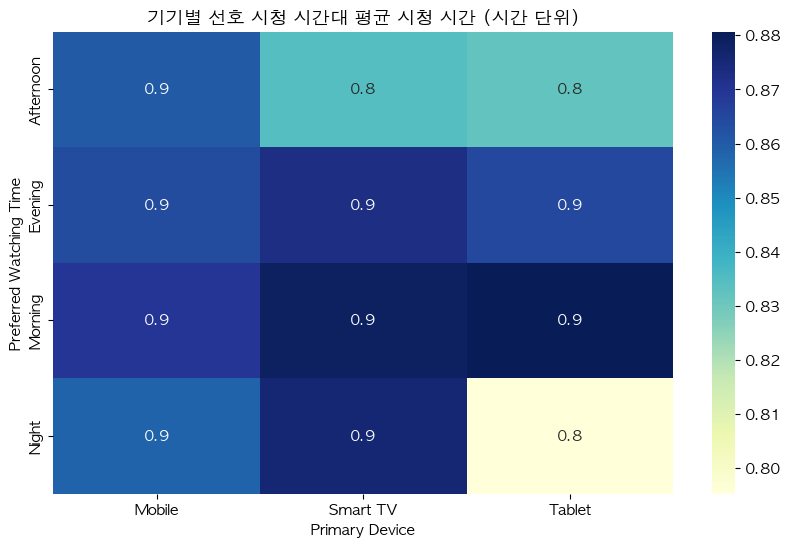

In [15]:
# 'Watch_Time_Hours' 값이 0 또는 음수인 데이터 확인
print(df[df['Watch_Time_Hours'] <= 0])

# 'Watch_Time_Hours' 값이 0 이하인 데이터는 제외
df_cleaned = df[df['Watch_Time_Hours'] > 0]

# 그룹화 후 평균 시청 시간 계산
device_time_group = df_cleaned.groupby(['preferred_watching_time', 'primary_device'])['Watch_Time_Hours'].mean().unstack()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(device_time_group, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('기기별 선호 시청 시간대 평균 시청 시간 (시간 단위)')
plt.ylabel('Preferred Watching Time')
plt.xlabel('Primary Device')
plt.show()


/opt/anaconda3/envs/Netflix/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/opt/anaconda3/envs/Netflix/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


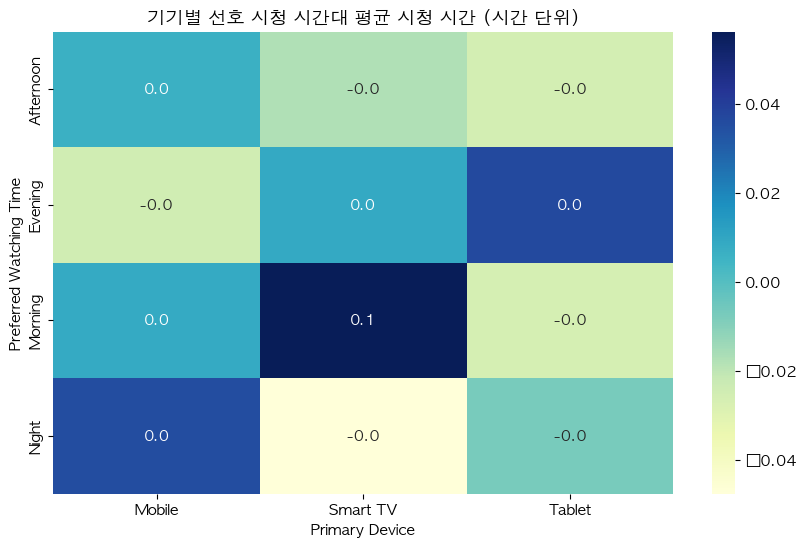

In [16]:
# 디바이스와 선호 시청 시간대 기준으로 그룹화 평균 시청 시간 보기
device_time_group = df.groupby(['preferred_watching_time', 'primary_device'])['Watch_Time_Hours'].mean().unstack()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(device_time_group, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('기기별 선호 시청 시간대 평균 시청 시간 (시간 단위)')
plt.ylabel('Preferred Watching Time')
plt.xlabel('Primary Device')
plt.show()


/var/folders/y6/6y5l3z5546z725wff41_qwtc0000gn/T/ipykernel_10969/2076843562.py:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/Netflix/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


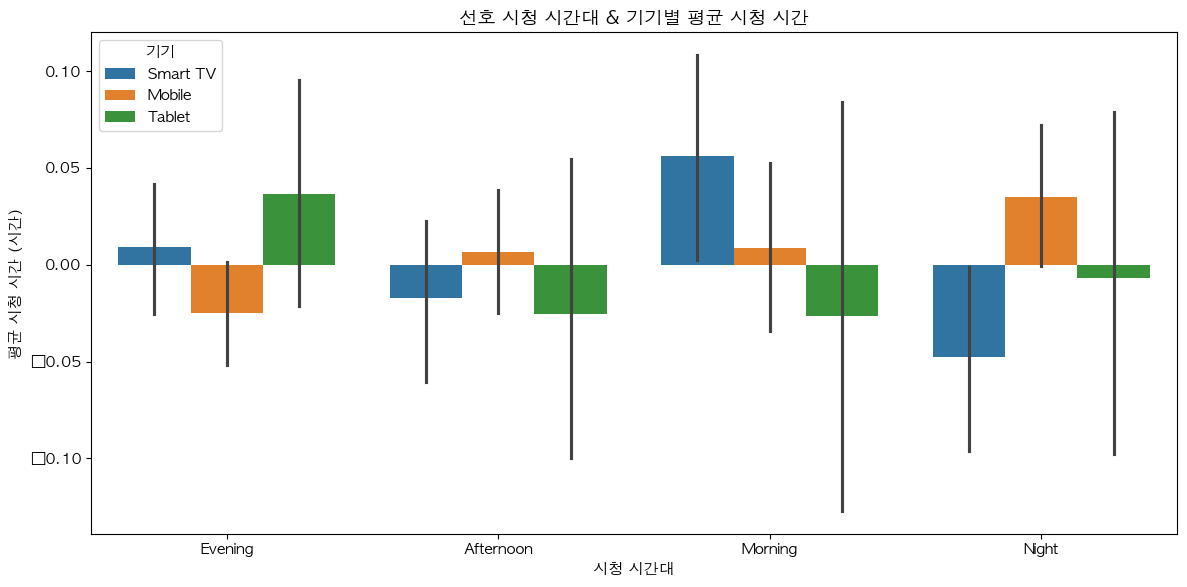

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='preferred_watching_time',
    y='Watch_Time_Hours',
    hue='primary_device',
    estimator='mean'
)
plt.title('선호 시청 시간대 & 기기별 평균 시청 시간')
plt.ylabel('평균 시청 시간 (시간)')
plt.xlabel('시청 시간대')
plt.legend(title='기기')
plt.tight_layout()
plt.show()

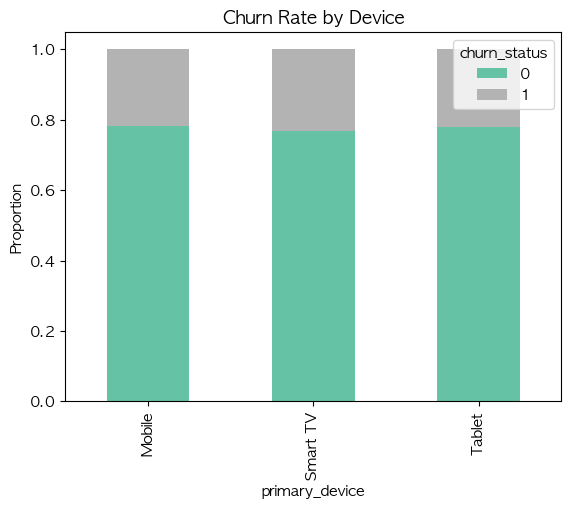

In [18]:
# 디바이스별 이탈률 분석
churn_by_device = df.groupby('primary_device')['churn_status'].value_counts(normalize=True).unstack()
churn_by_device.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Churn Rate by Device')
plt.ylabel('Proportion')
plt.show()

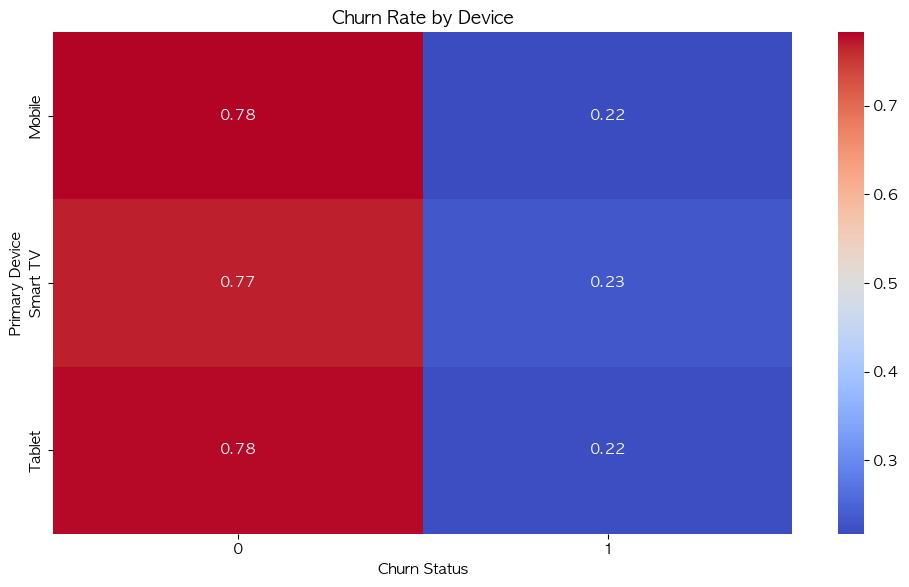

In [19]:
# 이탈률 계산 후 히트맵 시각화
churn_by_device_rate = df.groupby('primary_device')['churn_status'].value_counts(normalize=True).unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(churn_by_device_rate, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Churn Rate by Device')
plt.ylabel('Primary Device')
plt.xlabel('Churn Status')
plt.tight_layout()
plt.show()


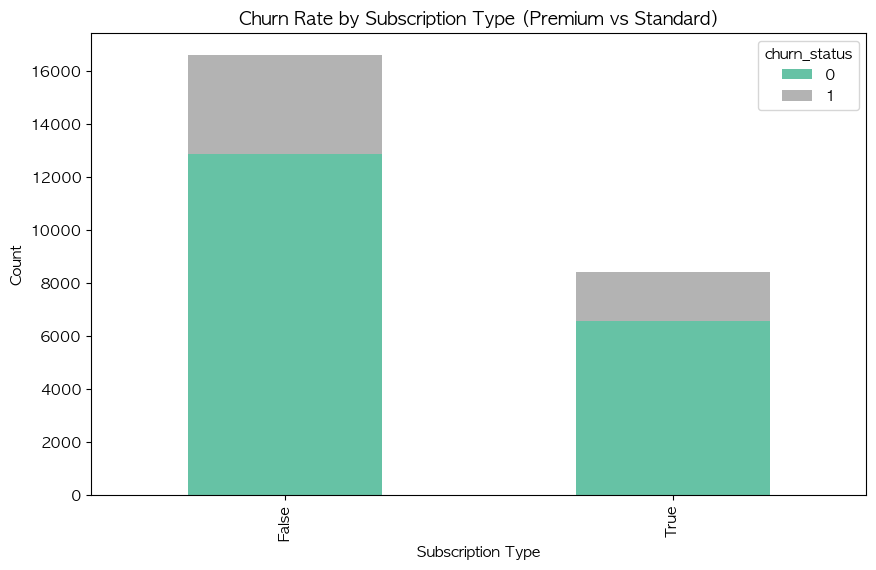

In [20]:
churn_by_subscription = df.groupby(['Subscription_Type_Premium', 'churn_status']).size().unstack()
churn_by_subscription.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Churn Rate by Subscription Type (Premium vs Standard)')
plt.ylabel('Count')
plt.xlabel('Subscription Type')
plt.show()



/opt/anaconda3/envs/Netflix/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


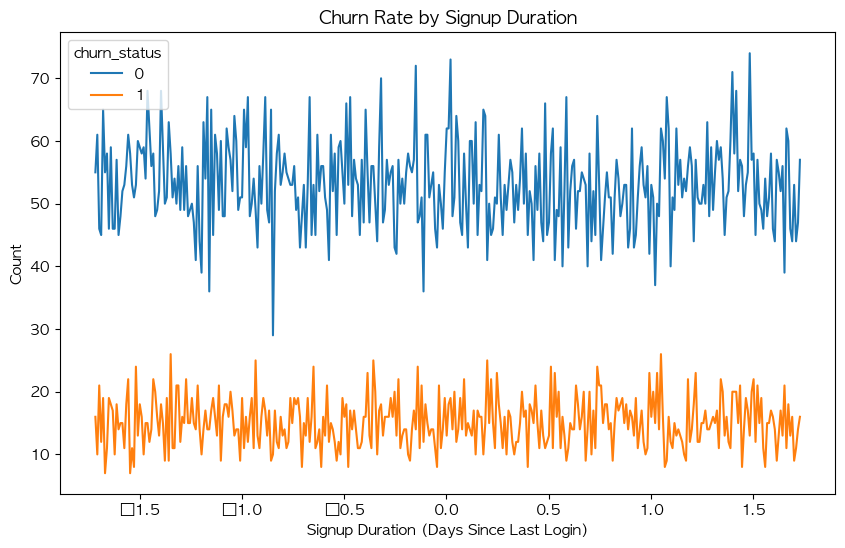

In [21]:
# 가입 기간과 이탈률
churn_by_signup_duration = df.groupby(['days_since_last_login', 'churn_status']).size().unstack()
churn_by_signup_duration.plot(kind='line', figsize=(10, 6))
plt.title('Churn Rate by Signup Duration')
plt.ylabel('Count')
plt.xlabel('Signup Duration (Days Since Last Login)')
plt.show()


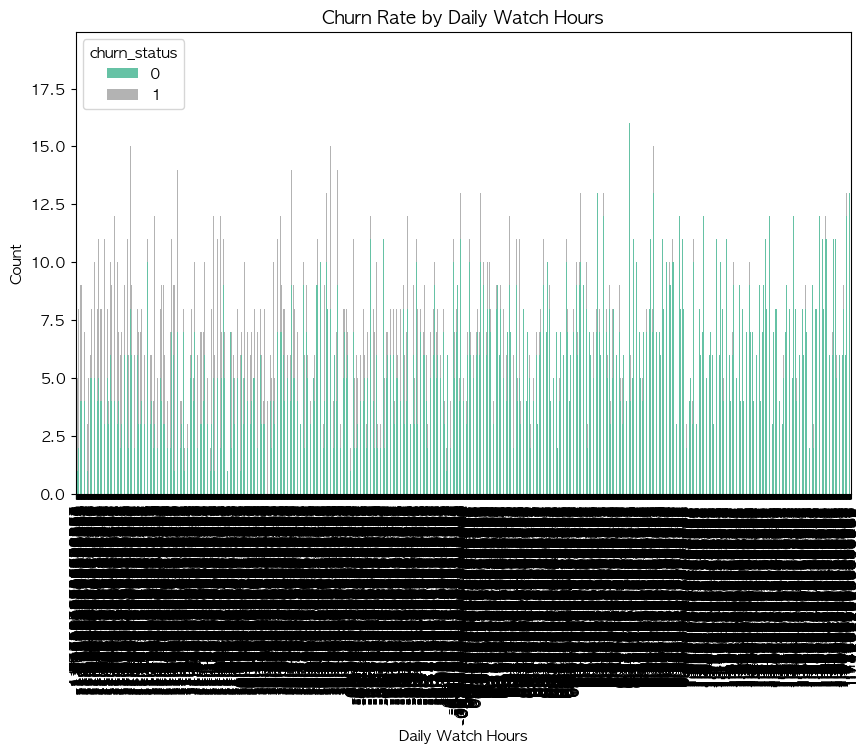

In [22]:
# 사용랼 분석  - 검은색은 아마도 결측값...?
churn_by_usage = df.groupby(['daily_watch_hours', 'churn_status']).size().unstack()
churn_by_usage.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Churn Rate by Daily Watch Hours')
plt.ylabel('Count')
plt.xlabel('Daily Watch Hours')
plt.show()
